In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\nobel'

In [3]:
os .chdir("C:/Users/nobel/OneDrive/Desktop/EDA and streamlit")

In [4]:
df = pd.read_csv("box_plot.csv")
df

,invoice_number,invoice_amount
0,P001,241
1,P002,525
2,P003,620
3,P004,588
4,P005,878
...,...,...
95,P096,411
96,P097,429
97,P098,458
98,P099,473


In [5]:
import matplotlib.pyplot as plt

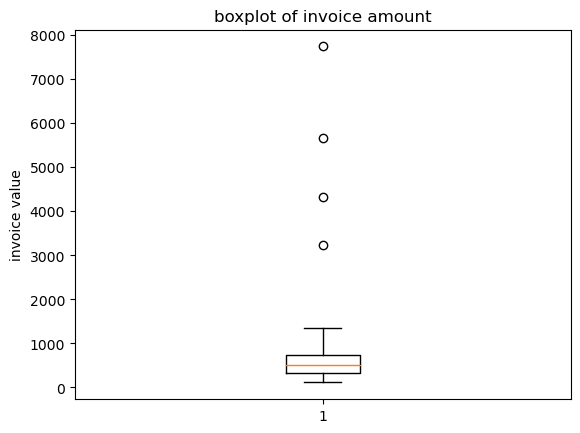

In [7]:
plt.boxplot(df['invoice_amount'])
plt.title('boxplot of invoice amount')
plt.ylabel('invoice value')
plt.show()

In [9]:
# Identify outliers using the IQR method
Q1 = df['invoice_amount'].quantile(0.25)
Q3 = df['invoice_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

409.75

In [10]:
#define the bounderies or  minimum and maximum of this variable
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Get the outliers
outliers = df[(df['invoice_amount'] < lower_bound) | (df['invoice_amount'] > upper_bound)]
outliers


,invoice_number,invoice_amount
13,P014,7744
39,P040,5663
56,P057,3244
75,P076,4325


In [13]:
#Anouther dataset
# Load your data (replace with the correct path to your file)
data = pd.read_csv('box_plot_multiple.csv')
data

,Segment,Region,Invoice_Value
0,Mass Market,West,16884.9000
1,Premium,East,1725.6000
2,Premium,East,4449.5000
3,Premium,North,21984.5000
4,Premium,North,3866.9000
...,...,...,...
1333,Premium,North,10600.5483
1334,Mass Market,South,2205.9808
1335,Mass Market,East,1629.8335
1336,Mass Market,West,2007.9450


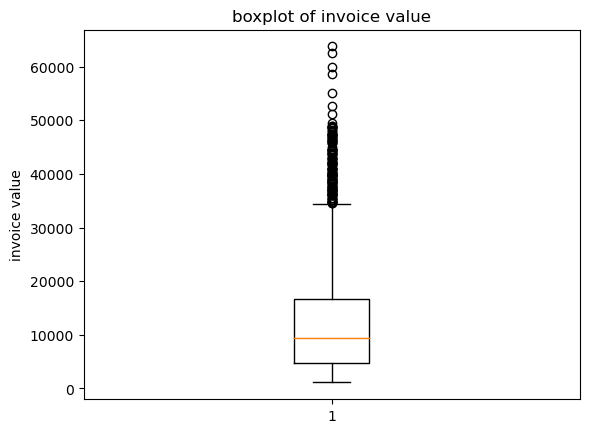

In [14]:
plt.boxplot(data['Invoice_Value'])
plt.title('boxplot of invoice value')
plt.ylabel('invoice value')
plt.show()

In [15]:
Q1 = data['Invoice_Value'].quantile(0.25)
Q3 = data['Invoice_Value'].quantile(0.75)
IQR = Q3 - Q1
IQR

11899.625365

In [16]:
# Define bounds for the outliers
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

In [17]:
# Get the outliers
outliers = data[(data['Invoice_Value'] < lower_bound1) | (data['Invoice_Value'] > upper_bound1)]
outliers

,Segment,Region,Invoice_Value
14,Premium,East,39611.75770
19,Premium,West,36837.46700
23,Mass Market,South,37701.87680
29,Premium,West,38711.00000
30,Premium,West,35585.57600
...,...,...,...
1300,Premium,East,62592.87309
1301,Premium,North,46718.16325
1303,Premium,West,37829.72420
1313,Mass Market,West,36397.57600


In [18]:
#if want tov analyze invoice value corresponding to different regions  and also corresponding to segment . its possible by matplotlib but will be 
#complicated. so import seaborn , that help complex boxplot in simple manner 
import seaborn as sns

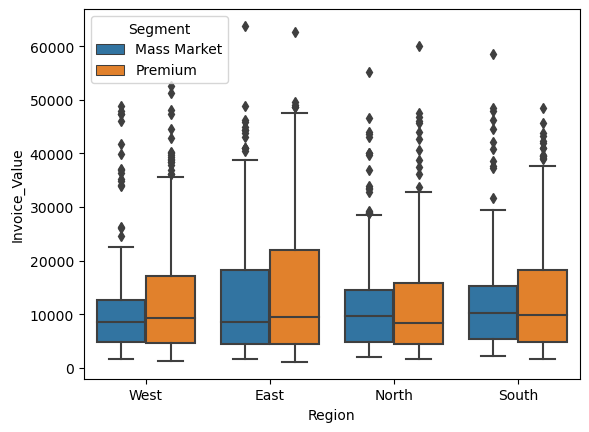

In [19]:
ax = sns.boxplot(x='Region', y='Invoice_Value', hue='Segment', data=data, dodge=True)

In [ ]:
#it appears more outliars in north and west region , Go ahead and investigate , there wealth of info that could be used by finance 

In [ ]:
# anouther type analysis by boxplt what ur management will be interested percentage of outliar in different region across segment

In [21]:
# Calculate the total number of data points and the number of outliers in each group
total_data_points = data.groupby(['Segment', 'Region']).size()
total_outliers = outliers.groupby(['Segment', 'Region']).size()


In [22]:
total_data_points

Segment      Region
Mass Market  East      175
             North     164
             South     161
             West      162
Premium      East      189
             North     161
             South     163
             West      163
dtype: int64

In [23]:
total_outliers

Segment      Region
Mass Market  East      19
             North      9
             South     10
             West      12
Premium      East      38
             North     11
             South     18
             West      22
dtype: int64

In [24]:
Total_outliar_percentage = total_data_points/total_outliers * 100
Total_outliar_percentage

Segment      Region
Mass Market  East       921.052632
             North     1822.222222
             South     1610.000000
             West      1350.000000
Premium      East       497.368421
             North     1463.636364
             South      905.555556
             West       740.909091
dtype: float64

In [27]:
# Reset the index to have 'Segment' and 'Region' as columns instead of indices
outlier_percentage =Total_outliar_percentage.reset_index(name='Outlier Percentage')
outlier_percentage

,Segment,Region,Outlier Percentage
0,Mass Market,East,921.052632
1,Mass Market,North,1822.222222
2,Mass Market,South,1610.000000
3,Mass Market,West,1350.000000
4,Premium,East,497.368421
5,Premium,North,1463.636364
6,Premium,South,905.555556
7,Premium,West,740.909091


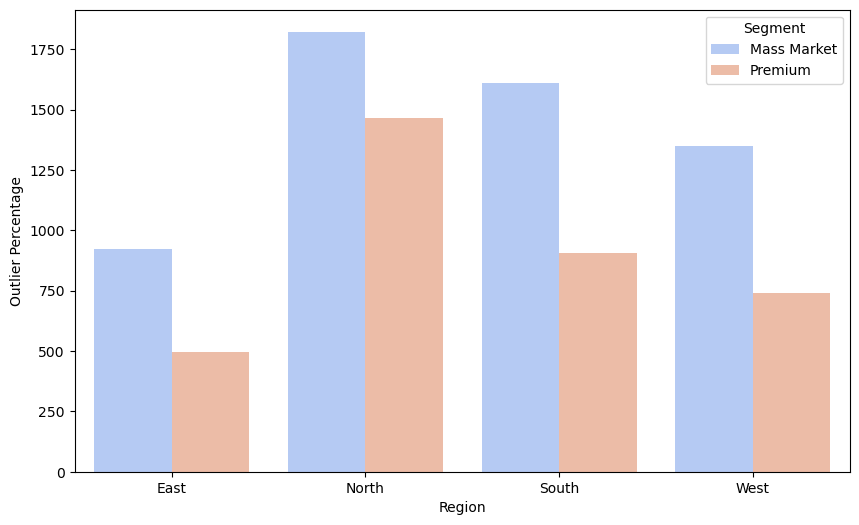

In [28]:

# Create a bar chart to visualize the percentage of outliers in different regions for different segments
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Region', y='Outlier Percentage', hue='Segment', data=outlier_percentage, palette='coolwarm')
